# CS178 LAB 3 WINTER 2017
# KODY CHEUNG 85737824

### Problem 1A

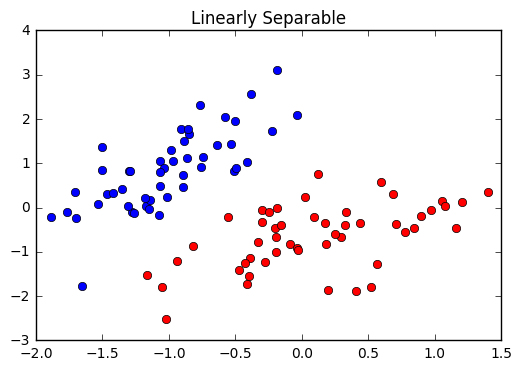

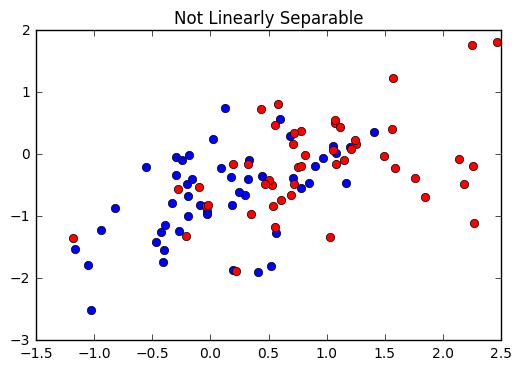

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

iris = np.genfromtxt("C:\Python35\CS178\Lab3\data\iris.txt",delimiter=None)

X, Y = iris[:,0:2], iris[:,-1]  #get first two features & targett
X, Y = ml.shuffleData(X,Y)
X,_  = ml.transforms.rescale(X)

XA, YA = X[Y<2,:], Y[Y<2]       #get class 0 vs 1 Y[Y<2] = Y[0]
XB, YB = X[Y>0,:], Y[Y>0]       #get clsas 1 vs 2 Y[Y>0] = Y[1]

colors = ['b','r']
for c in np.unique(YA):
    plt.plot(XA[YA==c, 0], XA[YA==c, 1], 'o', color = colors[int(c)])
plt.title("Linearly Separable")
plt.show()


for c in np.unique(YB):
    plt.plot(XB[YB==c, 0], XB[YB==c, 1], 'o', color = colors[int(c)-1])
plt.title("Not Linearly Separable")
plt.show()


### Problem 1B

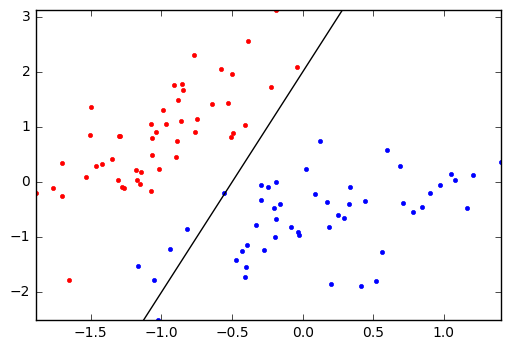

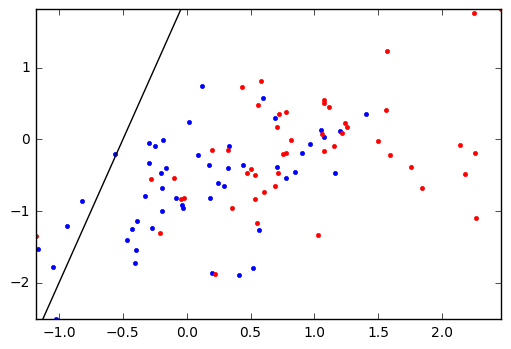

In [2]:
from logisticClassify2 import *

# data A
learnerA = logisticClassify2(); # create "blank" learner
learnerA.classes = np.unique(YA) # define class labels using YA or YB

wts = np.array([0.5,1,-.25]);  # set theta0, theta1, and theta2
learnerA.theta = wts; # set the learner's parameters

learnerA.plotBoundary(XA,YA)
plt.show()


# data B
learnerB = logisticClassify2(); # create "blank" learner
learnerB.classes = np.unique(YB) # define class labels using YA or YB

wts = np.array([0.5,1,-.25]);  # set theta0, theta1, and theta2
learnerB.theta = wts; # set the learner's parameters


learnerB.plotBoundary(XB,YB)
plt.show()


### Problem 1C

In [3]:
from sklearn.metrics import mean_squared_error


YAhat = learnerA.predict(XA)

mse = mean_squared_error(YA, YAhat)
print("Error rate on data set A: {}\n".format(mse))


YBhat = learnerB.predict(XB)

mseB = mean_squared_error(YB, YBhat)
print("Error rate on data set B: {}".format(mseB))


Error rate on data set A: 0.050505050505050504

Error rate on data set B: 0.46464646464646464


### Problem 1D

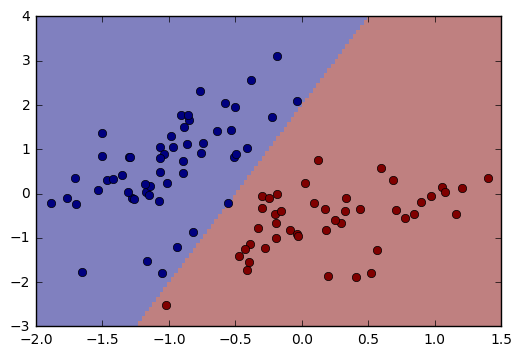

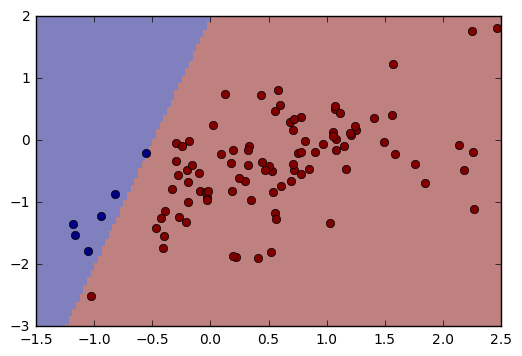

In [4]:
ml.plotClassify2D(learnerA, XA, YAhat)
plt.show()

ml.plotClassify2D(learnerB, XB, YBhat)
plt.show()

### Problem 1E

#Derivation of the gradient of the negative log likelihood J for logistic regression


<img src="Derivative.png">
  

Code:

ri    = XX[i].dot(self.theta.T);     #linear response

sigmoid = 1/(1 + math.exp(-ri));     #sigma function

<br />
<br />
  
gradi = XX[i].dot(sigmoid-YY[i]);    #derivative of negative log likelihood loss


J'(theta) = X(sigmoid(X.dot(theta.T) - Y)





### Problem 1F

In [5]:
# #Train function in logisticClassify2

# def train(self, X, Y, initStep=.1, stopTol=1e-4, stopEpochs=200, plot=None):
#     """ Train the logistic regression using stochastic gradient descent """
#     M,N = X.shape;                     # initialize the model if necessary:
#     self.classes = np.unique(Y);       # Y may have two classes, any values
#     XX = np.hstack(((np.ones((M,1))),X)); # XX is X, but with an extra column of ones
#     YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1

#     ##        print(XX)
#     ##        print(YY)

#     if len(self.theta)!=N+1:
#         self.theta=np.random.rand(N+1);

#     # init loop variables:
#     epoch=0; done=False; Jnll=[]; J01=[];

#     while not done:
#         stepsize = (initStep*2.0)/(2.0+epoch)
#         epoch = epoch+1; # update stepsize

#         # Do an SGD pass through the entire data set:
#         for i in np.random.permutation(M):
#             ri    = XX[i].dot(self.theta.T);     # TODO: compute linear response r(x)
#             sigmoid = 1/(1 + math.exp(-ri))
#             gradi = XX[i].dot(sigmoid-YY[i])#XX[i].dot XX[i].dot(ri - YY[i]);     #NotImplementedError## TODO: compute gradient of NLL loss
#             self.theta -= stepsize * gradi;  # take a gradient step

#         J01.append( self.err(X,Y) )  # evaluate the current error rate 

#         ## TODO: compute surrogate loss (logistic negative log-likelihood)
#         ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ] / M

#         sigma = 1/(1 + np.exp(-(XX.dot(self.theta.T))))
#         #print(sigma)
#         Jsur = (-np.mean(YY * np.log(sigma) + (1-YY)*np.log(1-sigma)))
#         #print(Jsur)
#         Jnll.append( Jsur ) # TODO evaluate the current NLL loss
#         plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
#         if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
#         plt.pause(.01);                    # let OS draw the plot

#         #print(epoch)
#         #plt.show()
#         plt.gcf().clear()
#         ## For debugging: you may want to print current parameters & losses
#         #print (self.theta, ' => ', Jsur[-1], ' / ', J01[-1]  )
#         ##            print(self.theta)
#         ##            if (epoch > 2):
#         ##                print(abs(Jnll[-2]-Jsur))
#         # raw_input()   # pause for keystroke

#         # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
#         if (epoch > stopEpochs):#or abs(Jnll[-2] - Jnll[-1]) < stopTol):
#             done = True;   # or if Jnll not changing between epochs ( < stopTol )


### Problem 1G

Data Set A
Blue: Surrogate Loss
Red: 0-1 Loss


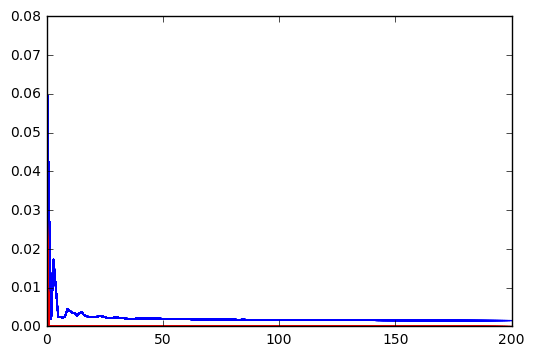

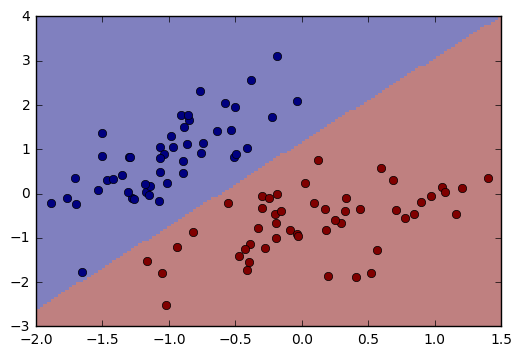

Data Set B
Blue: Surrogate Loss
Red: 0-1 Loss


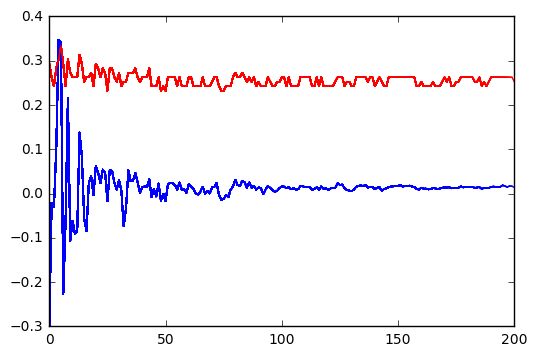

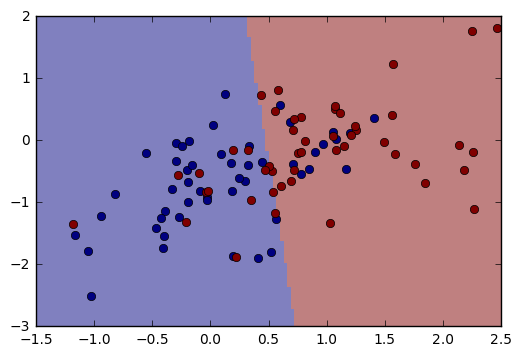

In [6]:

# I chose 200 epochs so it wouldn't load too long but show the convergence
# I used a stepsize of 1 to create an accurate fit, even though the first couple epochs
#       had negative surrogate losses

print("Data Set A")
print("Blue: Surrogate Loss")
print("Red: 0-1 Loss")
learnerA.train(XA,YA)


ml.plotClassify2D(learnerA, XA, YA)
plt.show()


print("Data Set B")
print("Blue: Surrogate Loss")
print("Red: 0-1 Loss")
learnerB.train(XB,YB)



ml.plotClassify2D(learnerB, XB, YB)
plt.show()


### Problem 2

<img src="Points.png">


a) T(a+bx)

This function can shatter graphs 1, 2, and 3, but not 4.
Suppose the points were red, blue, blue, red, from right to left. No straight line could split the red from blue.

VC <= 3

</br>

b) T((x<sub>1</sub> - a)<sup>2</sup> + (x<sub>1</sub> - b)<sup>2</sup> + c)

This function can shatter 1, but not the rest, because if a class 1 point is closer to the center of a class 0 circle, then it would not be able to shatter the points.

VC = 1

</br>

c) T((a * b)x<sub>1</sub> + (c / a)x<sub>2</sub>)

This function can shatter 1, 2 and 3, but not 4.
This also a straight line so it cannot cross 2 points just like the learner in part a.

VC <= 3

</br>
